# Tarea del caos

In [107]:
from sympy import *
import matplotlib.pyplot as plt
from ipywidgets import interact, fixed

<div class="alert alert-info">
    
**Ejercicio**  Define la función `logistic_map` que recibe como parámetros $x$ y $r$ regresa $rx(1−x)$. 
</div>

In [2]:
def logistic_map(x,r):
    return r*x*(1-x)

<div class="alert alert-info">
    
**Ejercicio** Calcule el punto fijo para $r = 2$ usando SymPy
</div>

In [20]:
x=Symbol('x')
r=Symbol('r')

In [15]:
solve(Eq(logistic_map(x,2),x))

[0, 1/2]

<div class="alert alert-info">
    
**Ejercicio** ¿Cuáles son las condiciones de estabilidad para el parámetro $r$? Los valores de $r$ para cuales cambia de estable a inestable y viceversa, se llaman _puntos de bifurcación_.
</div>

In [31]:
solve(abs(diff(logistic_map(x,r),x).replace(x,1-1/r))<1)

(1 < r) & (r < 3)

<div class="alert alert-info">
    
**Ejercicio** Define una función `iterar` que reciba una función `g`, un punto inicial `x0`, un entero `N` y el parámetro `r` regrese $g(g( \ldots(g(x_0, r),r) \ldots)$. En otras palabras que itere `g`, `N` veces a partir del punto `x0`.
</div>

In [40]:
def iterar(g,x0,N,r):
    if N==1:
        return g(x0,r)
    else:
        x0=g(x0,r)
        return iterar(g,x0,N-1,r)

<div class="alert alert-info">
    
**Ejercicio** Define una función `iterarLista` que reciba una función `g`, un punto inicial `x0`, un entero `N` y el parámetro $r$ regrese la lista $[x_0, g(x), g(g(x)), \ldots g(g(\ldots(g(x))\ldots))]$ En otras palabras que itere `g`, `N-1` veces a partir del punto `x0` y devuelva la órbita completa empezando desde `x0`.
</div>

In [59]:
def iterarLista(g,x0,N,r):
    list_iter=[x0]
    for i in range(N-1):
        list_iter.append(iterar(g,x0,i+1,r))
    return list_iter

<div class="alert alert-info">
    
**Ejercicio** Usa las funciones recién definidas para calcular iteraciones para $r = \{ 0.8, 1.2, 2.8, 3.2\}$,
</div>

In [84]:
iterar(logistic_map,x,3,0.8)

0.512*x*(1 - x)*(-0.8*x*(1 - x) + 1)*(-0.64*x*(1 - x)*(-0.8*x*(1 - x) + 1) + 1)

In [85]:
iterarLista(logistic_map,x,3,0.8)

[x, 0.8*x*(1 - x), 0.64*x*(1 - x)*(-0.8*x*(1 - x) + 1)]

In [86]:
iterar(logistic_map,x,3,1.2)

1.728*x*(1 - x)*(-1.2*x*(1 - x) + 1)*(-1.44*x*(1 - x)*(-1.2*x*(1 - x) + 1) + 1)

In [87]:
iterarLista(logistic_map,x,3,1.2)

[x, 1.2*x*(1 - x), 1.44*x*(1 - x)*(-1.2*x*(1 - x) + 1)]

In [89]:
iterar(logistic_map,x,3,2.8)

21.952*x*(1 - x)*(-2.8*x*(1 - x) + 1)*(-7.84*x*(1 - x)*(-2.8*x*(1 - x) + 1) + 1)

In [88]:
iterarLista(logistic_map,x,3,2.8)

[x, 2.8*x*(1 - x), 7.84*x*(1 - x)*(-2.8*x*(1 - x) + 1)]

In [90]:
iterar(logistic_map,x,3,3.2)

32.768*x*(1 - x)*(-3.2*x*(1 - x) + 1)*(-10.24*x*(1 - x)*(-3.2*x*(1 - x) + 1) + 1)

In [91]:
iterarLista(logistic_map,x,3,3.2)

[x, 3.2*x*(1 - x), 10.24*x*(1 - x)*(-3.2*x*(1 - x) + 1)]

<div class="alert alert-info">
    
**Ejercicio** Programa un control para cambiar $r$ entre $0$ y $4$ (con un slider) y otro para definid $x_0$. Grafica `logistic_map` respecto al número de iteraciones $N$. ¿Qué observas? ¿Puedes ver algún _periodo_?¿Está cerca de los puntos fijos?
</div>

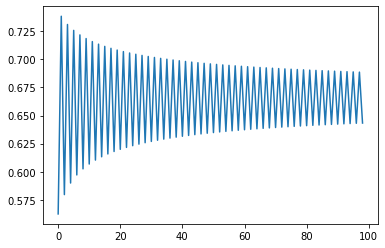

In [120]:
plt.plot(iterarLista(logistic_map,1/4,100,3)[1:])

<div class="alert alert-info">
    
**Ejercicio** ¿Qué sucede para (a) $x_0 = 0.35$ en $r = 2.8$ y (b) para $x_0 = 0.35$ en $r=3.1$. ¿Porqué escogí estos valores?
</div>

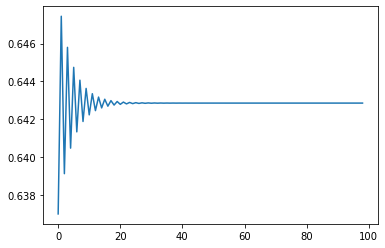

In [96]:
plt.plot(iterarLista(logistic_map,0.35,100,2.8)[1:])

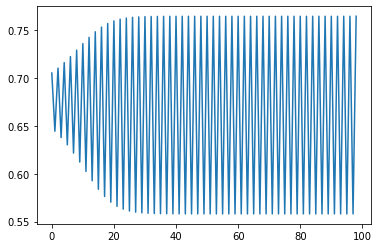

In [97]:
plt.plot(iterarLista(logistic_map,0.35,100,3.1)[1:])

# Diagrama de Cobweb

<div class="alert alert-info">
    
**Ejercicio** Dibuja en una gráfica `logistic_map`, como ejes usa $N_{n+1}$ y $N_n$, además agrega la línea $y = x$ en la misma gráfica. ¿Qué observas para los distintos valores de $r$? Grafícala junto a la gráfica anterior.
</div>

<div class="alert alert-info">
    
**Ejercicio** Agrega los segmentos de línea $(x_0, x_0), (x_0. f(x_0)), (f(x_0), f(x_0)), (f(x_0), f(f(x_0))), \ldots$
</div>

# Diagrama de bifurcación